In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from keras.utils import np_utils
import os
import pickle
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [12]:
path=r"C:\\Users\\devma\\OneDrive\\Desktop\\Project\\Latest\\"
X=pickle.load(open((path+"XMA_1.pickle"),'rb'))
y=pickle.load(open((path+"yMA_1.pickle"),'rb'))

X=X/255.0
y = np.array(y)

In [13]:
X = X.astype('float32')
X /= 255
Y = np_utils.to_categorical(y, 4)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
model=SVC(kernel='linear', gamma='auto', probability=True).fit(X_train, y_train)


In [15]:
y_pred=model.predict(X_test)
y_pred[:100] 

array([0, 0, 2, 2, 1, 0, 2, 2, 3, 0, 0, 2, 1, 3, 3, 2, 3, 1, 1, 3, 1, 0,
       0, 0, 0, 0, 3, 0, 3, 0, 3, 2, 2, 1, 2, 2, 0, 3, 0, 0, 0, 1, 0, 0,
       2, 2, 1, 1, 3, 3, 1, 0, 1, 0, 0, 2, 0, 0, 1, 0, 3, 0, 0, 2, 0, 2,
       0, 2, 0, 3, 1, 0, 2, 1, 1, 1, 0, 2, 0, 3, 1, 0, 2, 0, 1, 0, 2, 1,
       0, 1, 0, 0, 2, 0, 3, 0, 3, 0, 3, 2])

In [16]:
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] 
  n_classes = cm.shape[0] 

  
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) 
  fig.colorbar(cax)

  
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes), 
         xticklabels=labels, 
         yticklabels=labels)
  
  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  
  threshold = (cm.max() + cm.min()) / 2.

  
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

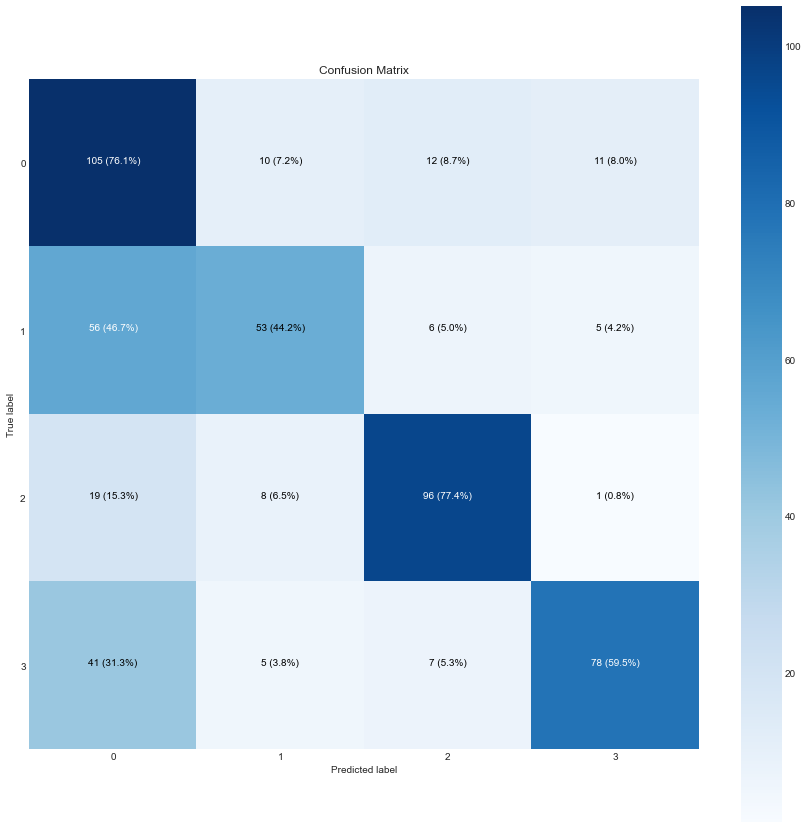

In [17]:
plt.style.use('seaborn-dark')
make_confusion_matrix(y_true=y_test, 
                      y_pred=y_pred,
                      figsize=(15, 15),
                      text_size=10)

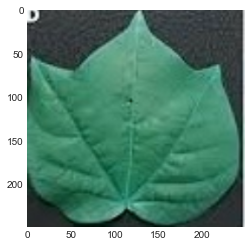

In [18]:
import cv2
img_array=cv2.imread("h19.jpg")
new_array = cv2.resize(img_array, (250, 250))
k=np.array(new_array).reshape(-1,187500)
k=k/255.0
plt.imshow(new_array)
plt.show()

In [19]:
pre=model.predict(k)
print(pre)

[3]


In [20]:
conf=model.predict_proba(k)
print(conf*100)

[[2.46763851e-12 2.24829285e-12 1.94482921e-12 1.00000000e+02]]


In [21]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y_pred))

Accuracy on unknown data is 0.6471734892787524


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.48      0.76      0.58       138
           1       0.70      0.44      0.54       120
           2       0.79      0.77      0.78       124
           3       0.82      0.60      0.69       131

    accuracy                           0.65       513
   macro avg       0.70      0.64      0.65       513
weighted avg       0.69      0.65      0.65       513



In [23]:
import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15): 
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] 
  n_classes = cm.shape[0] 

  
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) 
  fig.colorbar(cax)

  
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes), 
         xticklabels=labels, 
         yticklabels=labels)
  
  
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  
  threshold = (cm.max() + cm.min()) / 2.

  
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [24]:
result = pd.DataFrame({'original' : y_test,'predicted' : y_pred})

In [25]:
result

,original,predicted
0,3,0
1,0,0
2,2,2
3,2,2
4,1,1
...,...,...
508,0,0
509,0,1
510,3,0
511,1,1
